In [ ]:
#@title Call API {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

# import libraries
import tweepy
from tweepy import OAuthHandler

# api - credentials
consumer_key = '7hYMajyXwoGWacntSzaZiofOB'
consumer_secret = 'gzVfoRos2ybg7oHF3jaiLfKYZ5ifYX6U7XuuAMgKkLLsILp0wK'
access_key= '1154630220558696448-rp2lJGpVBPnT2YfrXUFFq5VUM1MqVA'
access_secret = 'dkGEOnxTlGcSfAZRB6eOTzsWkEevwFdJPZVjhb39BAGX8'
 
# Authorization to consumer key and consumer secret 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
 
# Access to user's access key and access secret 
auth.set_access_token(access_key, access_secret) 
 
# Calling api 
api = tweepy.API(auth)



In [ ]:
#@title Install necessary libraries, functions {display-mode: "form"}

# This code will be hidden when the notebook is loaded.
!pip install emoji
import emoji
 
# install 
!pip install wordcloud
!pip install tweet-preprocessor

# required libraries
import re
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
from textblob import TextBlob 
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from textblob import TextBlob
import preprocessor as p
import seaborn as sns

#import libraries
from nltk.tokenize import TweetTokenizer 
from gensim.models import Word2Vec

stop_words = set(stopwords.words('english')+['com'])

#extract emojis from the given text s into a
def extract_emojis(s):
  a=''.join(c for c in s if c in emoji.UNICODE_EMOJI)
  if(a==''):
    return None
  else:
    return a

!pip install emot
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
 
# Function for converting emojis into word
def convert_emojis(text):
    if(text==None):
      return None
    else:
      for emot in UNICODE_EMO:
          text = text.replace(emot, "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()))
      return text

#remove emoji from a text
def remove_emojis(text):
  if(text==''):
    return none
  else:
    for emot in UNICODE_EMO:
        text = text.replace(emot, " ")
    return text
def clean_tweets(lists):
  """
    Clean the lists of the text passed 
  """
  for i in range(len(lists)):
  #remove URL
    #p.set_options(p.OPT.URL,p.OPT.EMOJI,p.OPT.SMILEY)
    lists[i]=p.clean(str(lists[i]))
  
  #convert to lower text
    lists[i]=lists[i].lower()

  #remove numbers 
    lists[i] = re.sub(r'\d+','',lists[i])

  #remove punctuations
    lists[i]=re.sub(r"[\"#$%&()*+,-./:;<=>?@[\]^_`{|}~]", "",lists[i], flags=re.I)
    #lists[i] = re.sub(r'[\']'," ",lists[i],flags=re.I) #changing it's to it s but isn't to isn  t ,this can be dealt with by tokenizer..

  #remove multiple spaces
    lists[i]=re.sub(r"\s+"," ", lists[i], flags = re.I)
  
  #using text blob remove the spelling mistakes
    #lists[i]=TextBlob(lists[i]).correct()
    #print(i)

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n),stop_words=set(stopwords.words('english')+['com'])).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

     |████████████████████████████████| 51kB 1.6MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=e8d902e1669cff461cff4a8c312efe539d8b79c107bcd0b4d1eab575968a32f0
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#@title  {display-mode: "form"}

#@markdownEnter maximum tweets required
maximum_tweets = 3200  

#@markdownEnter number of tweets per query is required
maximum_tweets_per_query = 100

#@markdown Enter keywords
keywords = '@GSTN, @GSTCouncil,@askGSTech,@Infosys_GSTN'  #@param {type: "string"}

#@markdown Enter "from date"
from_date = '2020-06-06'  #@param {type: "date"}

#@markdown Enter "to date"
to_date = '2020-06-07' #@param {type: "date"}

In [ ]:
  #@title Extract data {display-mode: "form"}

  # This code will be hidden when the notebook is loaded.
  import time 
    
  #keeps count of total number of tweets obtained 
  no_of_tweets=0

  #list to store the tweets' attributes
  tweet_attr=[]
  user_mention_list=[]
  
  keywords= keywords.split(sep=",")

  for keyword in keywords: 
    query=keyword
     
    max_tweets =maximum_tweets 
    max_tweets_per_query =maximum_tweets_per_query 
    date1 = from_date
    date2 = to_date
  
    #if the number of tweets obtained is less than required, run the below loop
    while(no_of_tweets < max_tweets):
      
      
      try:
          query=query+' -filter:retweets' 
 
          #query 
          tweets_list=api.search(wait_on_rate_limit=True,wait_on_rate_limit_notify=True,q=query,count=max_tweets_per_query,lang="en", since=date1,tweet_mode='extended') #tweet_mode to get full text
 
          #collecting attributes for each tweet obtained from the query
          for tweets in tweets_list:
              if tweets.created_at.date()!=date2:
                dates =  tweets.created_at.date() #tweet date
                times =  tweets.created_at.time() #tweet time
                tweet_id = (tweets._json['id']) #tweet ID
                tweet_id_str = (tweets._json['id_str']) #tweet ID in string
                text = tweets.full_text # full text of tweet - #for tweets.text - only a few words are being shown)
                only_text= remove_emojis(text)
                text_with_converted_emoji = convert_emojis(text) #convert emoji into text
                emoji_from_tweets = extract_emojis(text) #emojis extracted from the text 
                converted_emoji= convert_emojis(emoji_from_tweets) #convert the emoji into text form
                source = tweets.source #Utility used to post the Tweet, as an HTML-formatted string
                truncated = tweets.truncated #Indicates whether the value of the text parameter was truncated
                in_reply_to_status_id = tweets.in_reply_to_status_id #If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID.
                in_reply_to_status_id_str = tweets.in_reply_to_status_id_str #the string representation of the original Tweet’s ID 
                in_reply_to_user_id = tweets.in_reply_to_user_id #If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID.
                in_reply_to_user_id_str = tweets.in_reply_to_user_id_str #string representation of the original Tweet’s author ID.
                in_reply_to_screen_name = tweets.in_reply_to_screen_name #If the represented Tweet is a reply, this field will contain the screen name of the original Tweet’s author.
                user_id = tweets.user.id        #tweet author's ID
                user_id_str = tweets.user.id_str #tweet author's ID in string form
                user_name = tweets.user.name     #tweet author's name
                screen_name = tweets.user.screen_name #The screen name, handle, or alias that this user identifies themselves with
                location = tweets.user.location #location of user
                user_url = tweets.user.url       #tweet author's URL
                description = tweets.user.description  #The user-defined UTF-8 string describing their account
                protected = tweets.user.protected #When true, indicates that this user has chosen to protect their Tweets.
                verified = tweets.user.verified #When true, indicates that the user has a verified account
                followers_count = tweets.user.followers_count #The number of followers this account currently has. Under certain conditions of duress, this field will temporarily indicate “0”.
                friends_count = tweets.user.friends_count #The number of users this account is following (AKA their “followings”). Under certain conditions of duress, this field will temporarily indicate “0”.
                listed_count = tweets.user.listed_count #The number of public lists that this user is a member of. 
                favourites_count = tweets.user.favourites_count #The number of Tweets this user has liked in the account’s lifetime.
                statuses_count = tweets.user.statuses_count #number of Tweets (including retweets) issued by the user
                date_user_account = tweets.user.created_at.date() #user account created on that date
                time_user = tweets.user.created_at.time() #user account created on that time
  
                if(tweets._json['place']!=None):
                  place_id=tweets.place.id #string ID representing this place
                  place_url=tweets.place.url #URL representing the location of additional place metadata for this place
                  place_type=tweets.place.place_type #The type of location represented by this place.
                  place_short_name=tweets.place.name #Short human-readable representation of the place’s name.
                  place_full_name=tweets.place.full_name #Full human-readable representation of the place’s name
                  country_code=tweets.place.country_code #country code
                  country=tweets.place.country #country name
                else:
                  place_id=None
                  place_url=None 
                  place_type=None 
                  place_short_name=None 
                  place_full_name=None 
                  country_code=None 
                  country=None 
  
                retweet_count=tweets.retweet_count #Number of times this Tweet has been retweeted. 
                favorite_count=tweets.favorite_count #Indicates approximately how many times this Tweet has been liked by Twitter users.
                if(len(tweets.entities['hashtags'])==1):
                    hashtags_text=(tweets.entities['hashtags'][0]['text']) #Name of the hashtag, minus the leading ‘#’ character in the tweet text
                else:
                    hashtags_text= None
  
                user_mentions_count= len(tweets.entities['user_mentions']) #number of users mentions in the tweet
  
                if(len(tweets.entities['user_mentions'])>=1): #the lists stores the data of user mentions
                    for i in range (len(tweets.entities['user_mentions'])):
                      screen_name=tweets.entities['user_mentions'][i]['screen_name'] # screen name of the referenced user
                      mention_name=tweets.entities['user_mentions'][i]['name'] # author's name who had mentioned some other user
                      id_mention=tweets.entities['user_mentions'][i]['id']
                      id_str_mention=tweets.entities['user_mentions'][i]['id_str']
                      
                      user_mention_list.append([tweets.id,tweets.user.id,screen_name,mention_name,id_mention,id_str_mention]) #appended the tweet id and  user_id of the tweet along with user mentions so that incase a database is made, these can be used as primary keys
                    
                favorited= tweets.favorited #Indicates whether this Tweet has been liked by the authenticating user. 
                retweeted=tweets.retweeted #Indicates whether this Tweet has been Retweeted by the authenticating user. 
                #there are some more attributes as well which are causing problem ! "status object doen't have this feature"
                #some tweets have them while some don't !
                #possibly_sensitive = tweets.possibly_sensitive #an indicator that the URL contained in the Tweet may contain content or media identified as sensitive content. 
                topic= query[:query.find('-')].strip() #query keyword used for extarcting this particular tweet
                
                #append all the attributes to the list 
                tweet_attr.append([dates,times,tweet_id,tweet_id_str,text,only_text,text_with_converted_emoji,emoji_from_tweets,converted_emoji,source,truncated,in_reply_to_status_id,
                                    in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user_id,user_id_str,
                                    user_name,screen_name,location,user_url,description,protected,verified,followers_count,friends_count,listed_count,
                                    favourites_count,statuses_count,date_user_account,time_user,place_id,place_url,place_type,place_short_name,
                                    place_full_name,country_code,country,hashtags_text,user_mentions_count,retweet_count,favorite_count,favorited,retweeted,topic])
        
      
      except tweepy.TweepError as e:
            # Just exit if any error
            #print("some error : " + str(e))
            break
 
      #add the number of tweets to the total count
      no_of_tweets+=len(tweets_list)
      
      if(no_of_tweets>=3200):
        #print("I am sleeping")
        time.sleep(901) #wait for 15.1 min if the no. of tweets is ~3200
        no_of_tweets=0 #reset the value 
        
      #print("current no of tweets",no_of_tweets,"size of the list",len(tweet_attr),"for keyword",keyword)

some error : [{'code': 195, 'message': 'Missing or invalid url parameter.'}]
some error : [{'code': 195, 'message': 'Missing or invalid url parameter.'}]
some error : [{'code': 195, 'message': 'Missing or invalid url parameter.'}]
some error : [{'code': 195, 'message': 'Missing or invalid url parameter.'}]


In [ ]:
#@title Read data {display-mode: "form"}

#converting the lists into dataframe 
import pandas as pd
columns1=['dates','times','tweet_id','tweet_id_str','text','only_text','text_with_converted_emoji','emoji_from_tweets','converted_emoji','source','truncated','in_reply_to_status_id',
                              'in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name','user_id','user_id_str',
                              'user_name','screen_name','location','user_url','description','protected','verified','followers_count','friends_count','listed_count',
                              'favourites_count','statuses_count','date_user_account','time_user','place_id','place_url','place_type','place_short_name',
                              'place_full_name','country_code','country','hashtags_text','user_mentions_count','retweet_count', 'favorite_count','favorited','retweeted','topic'
]
columns2=['tweets_id','tweets_user_id','screen_name','mention_name','id_mention','id_str_mention']
df_1= pd.DataFrame(tweet_attr,columns=columns1)
df_2=pd.DataFrame(user_mention_list,columns=columns2)


df=df_1.copy()

#drop duplicates
df=df.drop_duplicates(subset=['text', 'only_text',
       'text_with_converted_emoji'])
df=df.reset_index(drop=True)




In [ ]:
#@title Process the data {display-mode: "form"}

#clean
df['clean']=df['only_text']
clean_tweets(df['clean'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to b

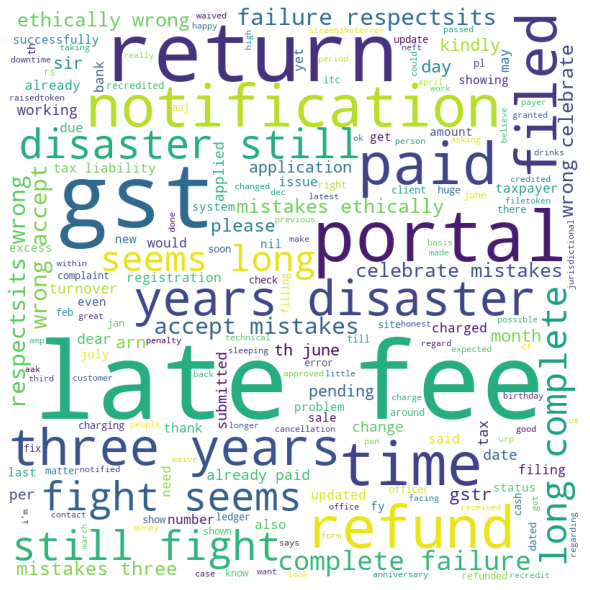

In [ ]:
#@title Word cloud {display-mode: "form"}
# generate word cloud function
def generate_wordcloud(lists):
  comment_words = '' 
  stopword = stopwords.words('english')+['com']
    
  # iterate through the words 
  for val in lists: 
        
      # typecaste each val to string 
      val = str(val) 
    
      # split the value 
      tokens = val.split() 

      comment_words += " ".join(tokens)+" "
    
  wordcloud = WordCloud(width = 800, height = 800, 
                  background_color ='white', 
                  stopwords = stopword, 
                  min_font_size = 10).generate(comment_words) 
    
  # plot the WordCloud image                        
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
    
  plt.show() 
generate_wordcloud(df['clean'])

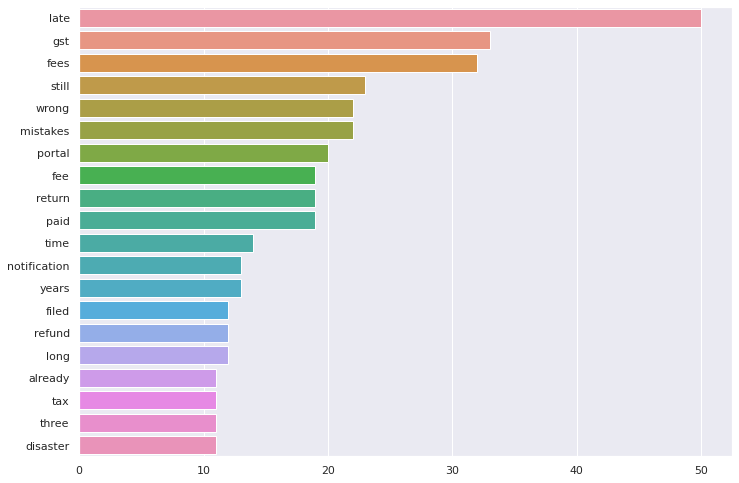

In [ ]:
#@title Frequently used words {display-mode: "form"}
top_n_bigrams=get_top_ngram(df['clean'],1)
x,y=map(list,zip(*top_n_bigrams))
sns.set(rc={'figure.figsize':(11.7,8.27)}) # resize the plot
sns.barplot(x=y,y=x)

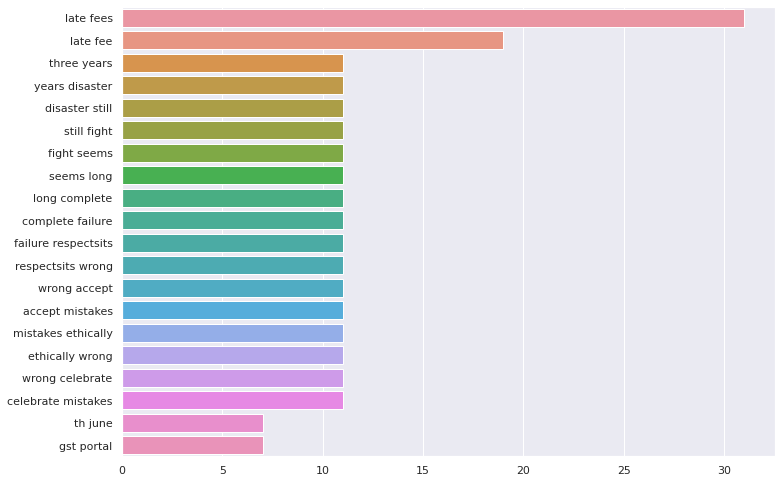

In [ ]:
#@title Frequently used word pairs {display-mode: "form"}
top_n_bigrams=get_top_ngram(df['clean'],2)
x,y=map(list,zip(*top_n_bigrams))
sns.set(rc={'figure.figsize':(11.7,8.27)}) # resize the plot
sns.barplot(x=y,y=x)

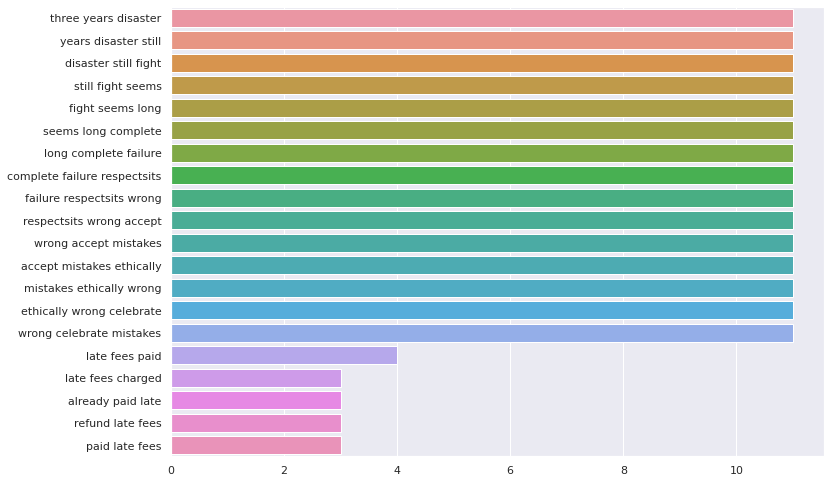

In [ ]:
#@title Frequently used word triplets {display-mode: "form"}
top_n_bigrams=get_top_ngram(df['clean'],3)
x,y=map(list,zip(*top_n_bigrams))
sns.set(rc={'figure.figsize':(11.7,8.27)}) # resize the plot
sns.barplot(x=y,y=x)

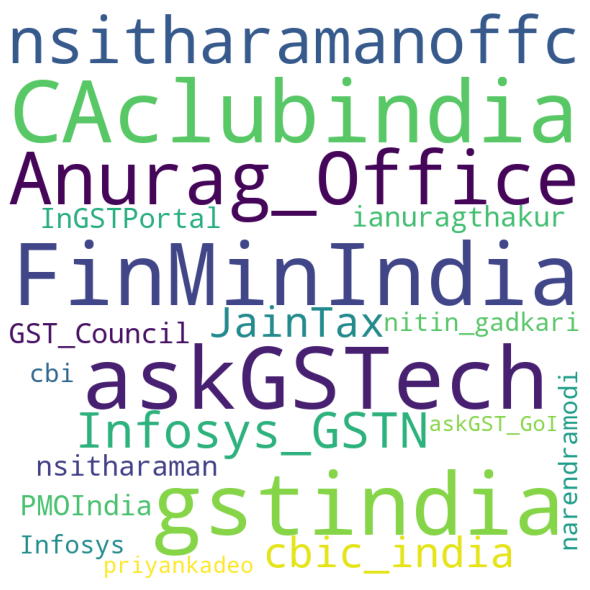

In [ ]:
#@title Screen names mentioned in tweets related to GSTN {display-mode: "form"}
generate_wordcloud(df['screen_name'].unique())

In [ ]:
#@title Number of followers  {display-mode: "form"}
#@markdown Select or enter the screen name 
select_or_input = "@Infosys_GSTN" #@param ["@askGSTech", "@Infosys_GSTN", "@InGSTPortal", "@GST_Council", "@GSTN_IT", "@gsthelpline"] {allow-input: true}
no_of_followers=api.followers_ids(screen_name=select_or_input)
print(len(no_of_followers))

5000


In [ ]:
#@title Number of unique authors engaged {display-mode: "form"}
# number of unique authors engaged
len(set(df['user_id_str']+df['in_reply_to_user_id_str']))

91

In [ ]:
#@title Tweet which has been maximum retweeted {display-mode: "form"}
i=df['retweet_count'].argmax()
df.iloc[i,:]['text']

'Late Fees Removed by GST portal for Jan-20, which was earlier reflecting in the month of Feb-20 return filing !!\n\n@cbic_india @Infosys_GSTN https://t.co/oy51Npg1pL'

In [ ]:
#@title Tweet which got maximum favourites {display-mode: "form"}
i=df['favorite_count'].argmax()
df.iloc[i,:]['text']

'Late Fees Removed by GST portal for Jan-20, which was earlier reflecting in the month of Feb-20 return filing !!\n\n@cbic_india @Infosys_GSTN https://t.co/oy51Npg1pL'

In [ ]:
#@title Top 10 positive tweets {display-mode: "form"}
df['sentiment_polarity']=df['clean'].apply(lambda x:TextBlob(str(x)).sentiment.polarity)

def cal_sentiment(i):

  if i<=-0.2:
    return "negative"
  elif i>=0.2:
    return "positive"
  else:
    return "neutral"

df['sentiment']=df['sentiment_polarity'].apply(cal_sentiment)

a=df['sentiment_polarity'].nlargest(n=10)

for i in a.index:
  print(df.iloc[i,:]['text'])
  print("\n")

@Infosys_GSTN Is there any changed in chair person who make decision today...???
If you see we have asked for change in nature but if you have changed the person will also a good one. if this kind continue no problem will come front of GST. Good Going...!!!


@Anurag_Office @UPGST @ashaychhaparia @gstindia @FinMinIndia @askGST_GoI @cbic_india @nsitharamanoffc @askGSTech 
Dear User, as per our records, your application has been successfully filed and is awaiting approval from the concerned tax official.


@Infosys_GSTN Great Move... Need of the time to keep motivating honest taxpayers.


@cagurujii @Infosys_GSTN Really Great step of Government at right time


@askGSTech We are using ERP and upload our Return Through ASP services. Is "URP"  in GST Number of customer accepted in GSTR-1 or it will show error "Invalid GST" 

for Unregistered customer we want to update "URP" in GST number, just want to confirm that its ok for GSTR1


@piyushexclusive @Infosys_GSTN @CappsTax @cbic_india @askG

In [ ]:
#@title Top 10 negative tweets {display-mode: "form"}
a=df['sentiment_polarity'].nsmallest(n=10)

for i in a.index:
  print(df.iloc[i,:]['text'])
  print("\n")

@Infosys_GSTN Re credited 😨😱😱....illegal collection 😱😱😱 @nsitharamanoffc @FinMinIndia @Anurag_Office @cbic_india


@dineshwadera @Infosys_GSTN its not fair @cbic_india


@Infosys_GSTN Cooperating from 3 years, how about you acknowledging it and fix the buggy portal. Seriously @Infosys is this your tech expertise?


@Infosys_GSTN GST REGISTRATION APPLICATION WAS SUBMITTED ON 09/06/2020 BUT EVEN AFTER 14 WORKING DAYS AND EVEN AFTER LODGING ISSUE AND COMPLAINT ON GST REDRESSAL PORTAL AGAIN AND AGAIN IT STILL SHOWING PENDING FOR PROCESSING STATUS ON GST PORTAL. 

ARN NO AA090620022008O https://t.co/G6qLWde8VN


@Infosys_GSTN Please also waive GSTR 4 F.Y 17 -18,18-19 LATE FEE...


@Infosys_GSTN What about them who already paid late fee for Mar-Apr 2020 ??? 
@gst, @cbic_india, @GSTN_IT, @FinMinIndia


@cbic_india @Anurag_Office
@Infosys_GSTN @SKHalakhandi
@nsitharamanoffc @askGST_GoI @gstindia
 @CAGauravtax
@JainTax
Yesterday we filed 3b for Feb 20-Apr 20, gst portal charged late fees on all

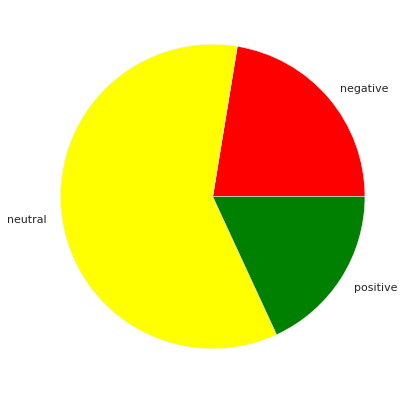

In [ ]:
#@title Distribution of tweets {display-mode: "form"}
from matplotlib import pyplot as plt 
import numpy as np 
  
  
senti = ['negative','neutral','positive'] 
  
data = df.groupby('sentiment').count()['sentiment_polarity']
  

fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels = senti, colors=['red','yellow','green']) 
  

plt.show() 

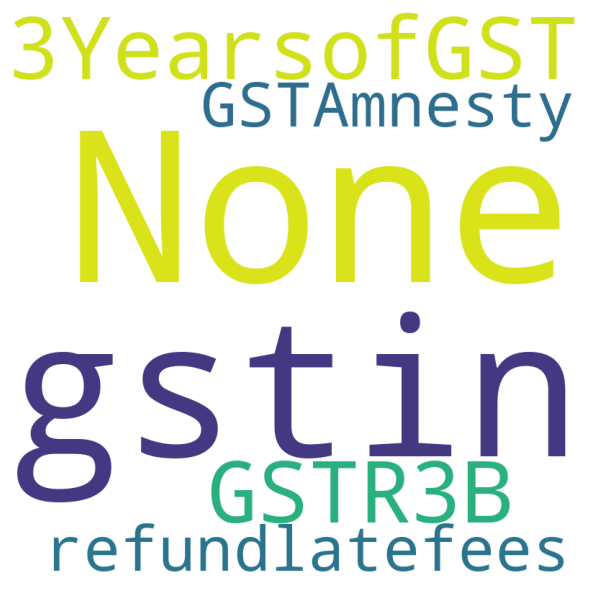

In [ ]:
#@title Hashtags  {display-mode: "form"}
generate_wordcloud(df['hashtags_text'].unique())

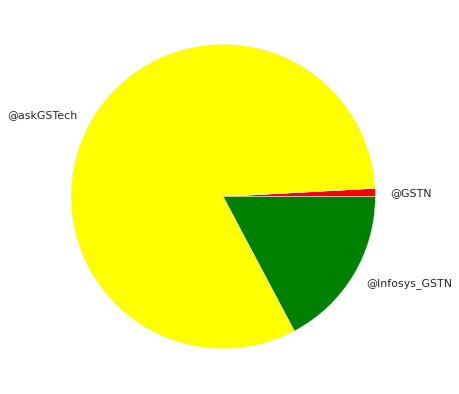

In [ ]:
#@title Distribution of tweets by twitter handles {display-mode: "form"}
from matplotlib import pyplot as plt 
import numpy as np 
  
  
senti = df['topic'].unique()
  
data = df.groupby('topic').count()['sentiment']
  

fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels = senti, colors=['red','yellow','green']) 
  

plt.show() 

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
files.upload()

Saving labelled_no_duplicate.csv to labelled_no_duplicate.csv


In [ ]:
df=pd.read_csv('labelled_no_duplicate.csv',sep=',')

ParserError: ignored

In [ ]:
df.columns

Int64Index([0], dtype='int64')

In [ ]:
#to extract emojis from "s" into a[]
        def extract_emojis(s):
            a = ''.join(c for c in s if c in emoji.UNICODE_EMOJI)
            if (a == ''):
                return None
            else:
                return a
        emojis=[]

        # Preprocessing ~Himu
        def preprocessing(raw_data):
            review_text = BeautifulSoup(raw_data, "html5lib").get_text()  # removes html tags
            emojis.append(extract_emojis(a) for a in review_text)
            x = re.sub("[^a-zA-Z]", " ", review_text)
            x = re.sub("[@]\w+", " ", x)  # remove usertags
            x = re.sub("[#\(\)\[\]]", " ", x)  # remove brackets and from hashtags
            x = re.sub("https?[\w./:]+", " ", x)  # remove urls
            x = re.sub("\.{2,}", " ", x)  # replacing 2+ dots to space
            x = re.sub("(.)\1+", "\1\1", x)  # replace multiple chars to 2 chars
            x = re.sub("(-|\')", " ", x)  # removing -|\''
            words = x.lower().split()  # split into words
            meaningful_words = list(filter(lambda x: (stemmer.stem(x)), words))
            meaningful_words = [w for w in meaningful_words if not w in stops]
            for wo in meaningful_words:
                if not 2 < len(wo) < 31:
                    meaningful_words.remove(wo)
            for we in meaningful_words:  # optimisation required
                preprocessed_words.append(we)